QA of MWS mock

# Setup

In [1]:
sys_path_hack_in = [
    '/gpfs/data/dph3apc/desi/modules/desitarget/gaiaselect/lib/python3.5/site-packages/desitarget-0.9.0-py3.5.egg',
    '/gpfs/data/dph3apc/desi/modules/bright_analysis/dev/lib/python3.5/site-packages/bright_analysis-c2a60b4.dev9-py3.5.egg',
    '/gpfs/data/dph3apc/desi/galaxia/runs/allsky20nowarp_subjobs/',
]

sys_path_hack_out = [
    '/cosma/home/dph3apc/modules/desi_stack/python3/bright_analysis/dev/lib/python3.5/site-packages',
    '/gpfs/data/DESI/software/modules/desitarget/0.9.0/lib/python3.5/site-packages/desitarget-0.9.0-py3.5.egg',   
    '/gpfs/data/DESI/software/modules/desitarget/0.9.0/lib/python3.5/site-packages',
]

import sys
for t in sys_path_hack_out:
    if t in sys.path: 
        print('Removing path:',t)
        sys.path.remove(t)
        
for t in sys_path_hack_in:
    if not t in sys.path: 
        print('Adding path:',t)
        sys.path.append(t)

Removing path: /gpfs/data/DESI/software/modules/desitarget/0.9.0/lib/python3.5/site-packages/desitarget-0.9.0-py3.5.egg
Removing path: /gpfs/data/DESI/software/modules/desitarget/0.9.0/lib/python3.5/site-packages
Adding path: /gpfs/data/dph3apc/desi/modules/desitarget/gaiaselect/lib/python3.5/site-packages/desitarget-0.9.0-py3.5.egg
Adding path: /gpfs/data/dph3apc/desi/galaxia/runs/allsky20nowarp_subjobs/


In [2]:
import desitarget
desitarget.__path__

['/gpfs/data/dph3apc/desi/modules/desitarget/gaiaselect/lib/python3.5/site-packages/desitarget-0.9.0-py3.5.egg/desitarget']

In [3]:
# Python imports
from importlib import reload
import os
import numpy as np
import astropy.io.fits as fits
import astropy.coordinates as c
from astropy.table import Table
import astropy.units as u
import mpl_toolkits.basemap
import matplotlib.pyplot as pl
import astropy.table as apy_table

In [4]:
# Desi-specific imports
import desitarget
reload(desitarget)
import desitarget.io
import desitarget.mock.io as mock_io
from desitarget import mws_mask, bgs_mask, desi_mask
reload(mock_io)
import desiutil.plots as desiplots
import bright_analysis
import bright_analysis.sweeps.io as sweeps
reload(sweeps);

import numpy.ma as ma

In [5]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
1+1

2

In [7]:
mockdir = '/gpfs/data/dph3apc/desi/galaxia/runs/allsky_20_nowarp_subjobs_2.0/healpix/'

In [8]:
ls /gpfs/data/dph3apc/desi/galaxia/runs/allsky_20_nowarp_subjobs_2.0/healpix/0/8-0/mock_allsky_galaxia_desi-8-0.fits

/gpfs/data/dph3apc/desi/galaxia/runs/allsky_20_nowarp_subjobs_2.0/healpix/0/8-0/mock_allsky_galaxia_desi-8-0.fits


# Read data

In [9]:
mockfiles = desitarget.io.iter_files(mockdir,'mock_allsky_galaxia_desi','fits')

In [10]:
%time t = apy_table.vstack([Table.read(_) for _ in mockfiles],metadata_conflicts='silent')

CPU times: user 5min 16s, sys: 1min 14s, total: 6min 31s
Wall time: 9min 8s


In [11]:
len(t)

53880068

In [12]:
t[0:2]

X,Y,Z,l,b,RA,DEC,pm_l,pm_b,pm_RA,pm_DEC,pm_l_kms,pm_b_kms,pm_RA_kms,pm_DEC_kms,v_helio,d_helio,DM,ABV,SDSSu_true_nodust,SDSSu_true,SDSSu_obs,SDSSg_true_nodust,SDSSg_true,SDSSg_obs,SDSSr_true_nodust,SDSSr_true,SDSSr_obs,SDSSi_true_nodust,SDSSi_true,SDSSi_obs,SDSSz_true_nodust,SDSSz_true,SDSSz_obs,FeH,age,teff,logg,mtip,mact,smass,popid,brickname,brickid,ipix8,vU,vV,vW,vRcyl,vPHIcyl,vZcyl,vX,vY,vZ,objid
kpc,kpc,kpc,deg,deg,deg,deg,,,,,km / s,km / s,km / s,km / s,km / s,kpc,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,mag,,,,,,,,,,,,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,km / s,
float32,float32,float32,float32,float32,float64,float64,float32,float32,float64,float64,float32,float32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,str128,int64,int32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64
8.02499,-0.00243761,-0.0267708,174.43,-46.8311,45.2702458753,2.66479884299,-14.0754,-16.5648,-21.6394414437,-2.06026584553,-2.4489,-2.88202,-3.76492412741,-0.358454011437,3.70959,0.0367056,2.82366,0.0199223,20.9283,21.031,21.031,17.3874,17.463,17.463,15.7608,15.8156,15.8156,14.3985,14.44,14.44,13.6449,13.6744,13.6744,-0.00567205,7.82477,3.49527,5.01771,6.25371,0.123901,0.123901,0,0450p000,215,0,-0.196164,2.47971,-4.6773,-10.8305,-241.563,2.5727,-10.9038,-241.56,2.5727,0
8.03336,-0.00387271,-0.0341965,173.379,-45.5146,45.6579110112,4.11822731459,13.5007,75.2549,61.5723917713,45.3256217095,3.06737,17.0979,13.9892750265,10.2980015815,17.4534,0.0479326,3.40315,0.0366005,20.4415,20.6301,20.6301,17.3748,17.5136,17.5136,15.884,15.9847,15.9847,14.7138,14.7902,14.7902,14.0352,14.0893,14.0893,0.0304262,7.93651,3.51703,5.13976,5.50623,0.149477,0.149477,0,0450p000,215,0,-24.6189,-0.230309,-0.470819,13.6341,-238.843,6.77918,13.5189,-238.85,6.77918,1


### Randomly downsample

In [13]:
rsample = np.random.choice(np.arange(0,len(t)),1000000,replace=False)

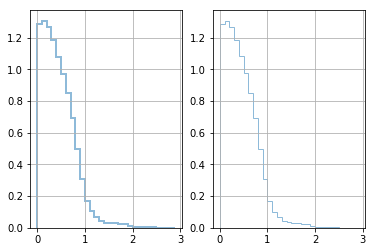

In [14]:
_f = figure()
ax = _f.add_subplot(121)
hist(np.log10(np.abs(t['d_helio'])),bins=np.arange(0,3,0.1),alpha=0.5,histtype='step',ls='solid',lw=2,normed=True);
grid();
ax = _f.add_subplot(122)
hist(ma.log10(np.abs(t['d_helio'][rsample])),bins=np.arange(0,3,0.1),alpha=0.5,histtype='step',normed=True);
grid();

# Positions

In [15]:
gc_gal = c.SkyCoord(0*u.deg,0*u.deg,frame='galactic')
gc_equ = gc_gal.transform_to('icrs')

Equatorial

/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl

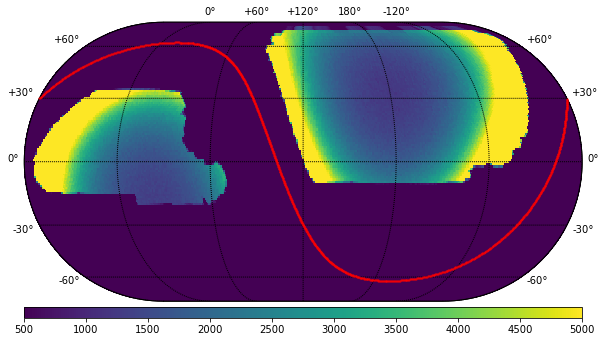

In [16]:
f = figure(figsize=(10,10))
my_basemap = desiplots.init_sky(projection='eck4', galactic_plane_color='r',
                                ra_labels=np.arange(-90, 90, 30), 
                                dec_labels=np.arange(0, 360, 60), 
                                ax=None)
ax = desiplots.plot_sky_binned(t['RA'],t['DEC'],max_bin_area=1.0,clip_lo=100*5,clip_hi=1000*5,basemap=my_basemap);
grid()

Galactic

/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl

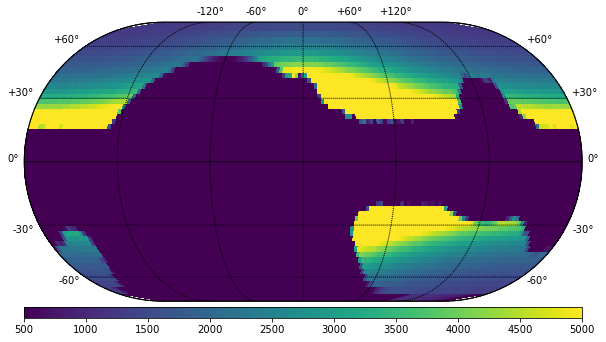

In [17]:
f = figure(figsize=(10,10))
my_basemap = desiplots.init_sky(projection='eck4', ra_center=0, galactic_plane_color='None',
                                ra_labels=np.arange(-90, 90, 30), 
                                dec_labels=np.arange(0, 360, 60), 
                                ax=None)
desiplots.plot_sky_binned(t['l'],t['b'],max_bin_area=5.0,clip_lo=100*5,clip_hi=1000*5,basemap=my_basemap);
grid()

Galactocentric cartesian coordinates

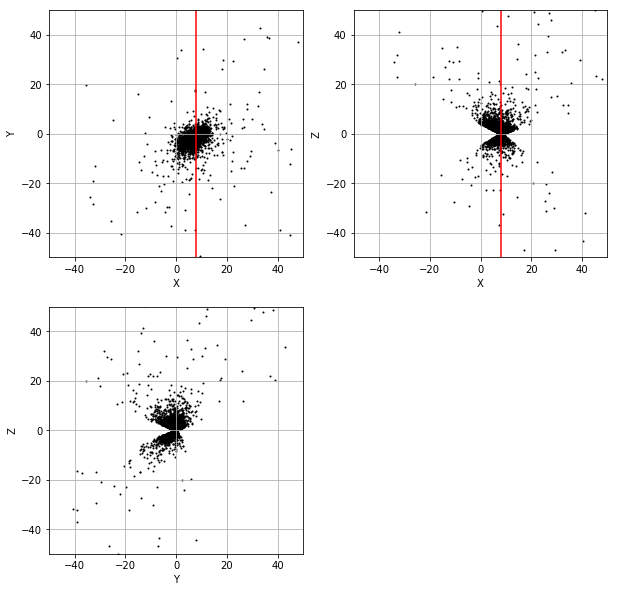

In [18]:
_f = figure(figsize=(10,10))
ax = _f.add_subplot(221)
scatter(t['X'][rsample[::100]],t['Y'][rsample[::100]],s=1,c='k',alpha=1);
xlim(-50,50)
xlabel('X')
ylim(-50,50)
ylabel('Y')
axvline(8,c='r')
grid()
ax = _f.add_subplot(222)
scatter(t['X'][rsample[::100]],t['Z'][rsample[::100]],s=1,c='k',alpha=1);
xlim(-50,50)
xlabel('X')
ylim(-50,50)
ylabel('Z')
axvline(8,c='r')
grid()
ax = _f.add_subplot(223)
scatter(t['Y'][rsample[::100]],t['Z'][rsample[::100]],s=1,c='k',alpha=1);
xlim(-50,50)
xlabel('Y')
ylim(-50,50)
ylabel('Z')
grid()

# Kinematics

### PM in Galactic latitude,  equatorial coordinates, 

/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl

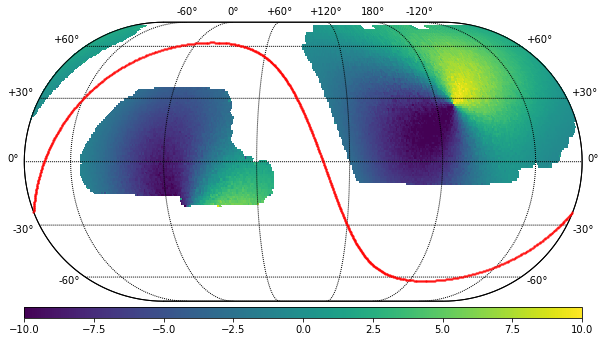

In [19]:
f = figure(figsize=(10,10))
my_basemap_radec = desiplots.init_sky(projection='eck4', ra_center=90, galactic_plane_color='r',ra_labels=np.arange(-90, 90, 30), 
                                dec_labels=np.arange(0, 360, 60), ax=None)
desiplots.plot_sky_binned(t['RA'],t['DEC'],data=t['pm_b'],clip_lo=-10,clip_hi=10,max_bin_area=1.0,basemap=my_basemap_radec);
grid()

### PM in Galactic longitude, equatorial coordinates 

/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl

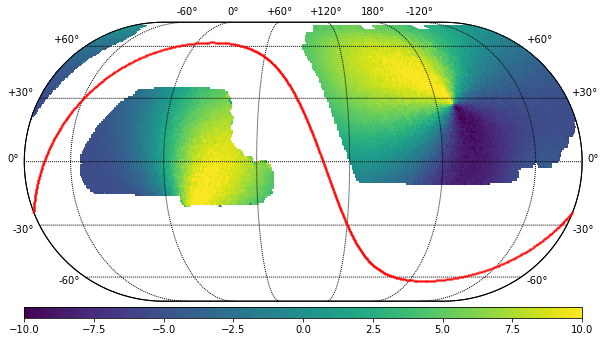

In [20]:
f = figure(figsize=(10,10))
my_basemap_radec = desiplots.init_sky(projection='eck4', ra_center=90, galactic_plane_color='r',ra_labels=np.arange(-90, 90, 30), 
                                dec_labels=np.arange(0, 360, 60), ax=None)
desiplots.plot_sky_binned(t['RA'],t['DEC'],data=t['pm_l'],clip_lo=-10,clip_hi=10,max_bin_area=1.0,basemap=my_basemap_radec);
grid()

### Magnitude of PM, equatorial coordintes

In [28]:
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

In [21]:
pmtot    = np.sqrt(t['pm_RA']**2+t['pm_DEC']**2)

/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/cosma/home/dph3apc/modules/basemap/lib/python3.5/site-packages/mpl

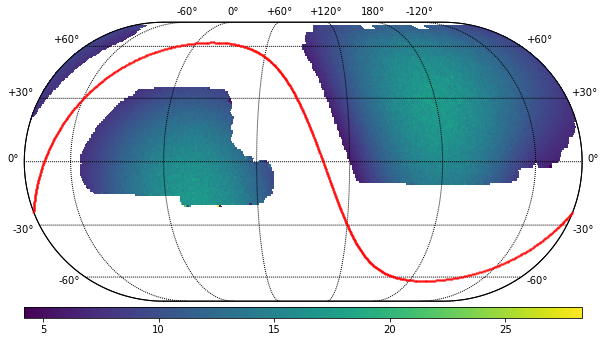

In [24]:
f = figure(figsize=(10,10))
my_basemap_radec = desiplots.init_sky(projection='eck4', ra_center=90, galactic_plane_color='r',ra_labels=np.arange(-90, 90, 30), 
                                dec_labels=np.arange(0, 360, 60), ax=None)
desiplots.plot_sky_binned(t['RA'],t['DEC'],data=pmtot,max_bin_area=1.0,clip_lo=0,clip_hi=40,
        basemap=my_basemap_radec);
grid()

### Magnitude of PM, Galactic coordinates

In [30]:
pmtot_lb = np.sqrt(t['pm_l']**2+t['pm_b']**2)

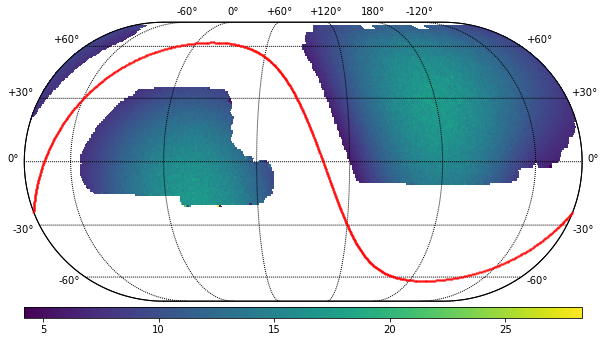

In [31]:
f = figure(figsize=(10,10))
my_basemap_radec = desiplots.init_sky(projection='eck4', ra_center=90, galactic_plane_color='r',ra_labels=np.arange(-90, 90, 30), 
                                dec_labels=np.arange(0, 360, 60), ax=None)
desiplots.plot_sky_binned(t['RA'],t['DEC'],data=pmtot_lb,max_bin_area=1.0,clip_lo=0,clip_hi=40,
        basemap=my_basemap_radec);
grid()

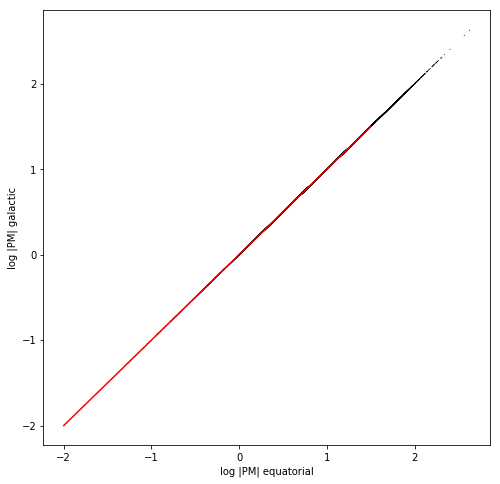

In [119]:
_f = figure(figsize=(8,8))
scatter(np.log10(pmtot[::1000]),np.log10(pmtot_lb[::1000]-),s=1,edgecolor='None',c='k');
plot([-2,1.5],[-2,1.5],c='r')
xlabel('log |PM| equatorial')
ylabel('log |PM| galactic');

### PM in Galactic latitude, Galactic coordinates

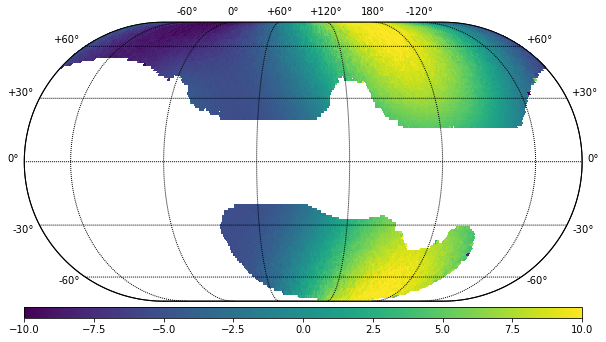

In [33]:
f = figure(figsize=(10,10))
my_basemap = desiplots.init_sky(projection='eck4', ra_center=90, 
                                galactic_plane_color='None',ra_labels=np.arange(-90, 90, 30), 
                                dec_labels=np.arange(0, 360, 60), ax=None)
desiplots.plot_sky_binned(t['l'],t['b'],data=t['pm_l'],max_bin_area=1.0,clip_lo=-10,clip_hi=10,basemap=my_basemap);
grid()

### Velocity in Galactic latitude, Galactic coordinates

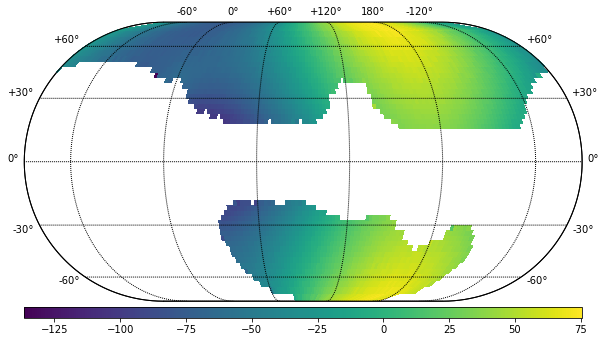

In [34]:
f = figure(figsize=(10,10))
my_basemap = desiplots.init_sky(projection='eck4', ra_center=90, galactic_plane_color='None',ra_labels=np.arange(-90, 90, 30), 
                                dec_labels=np.arange(0, 360, 60), ax=None)
desiplots.plot_sky_binned(t['l'],t['b'],data=t['pm_l_kms'],max_bin_area=5.0,clip_lo=-150,clip_hi=150,basemap=my_basemap);
grid()

### Heliocentric RV, equatorial coordinates

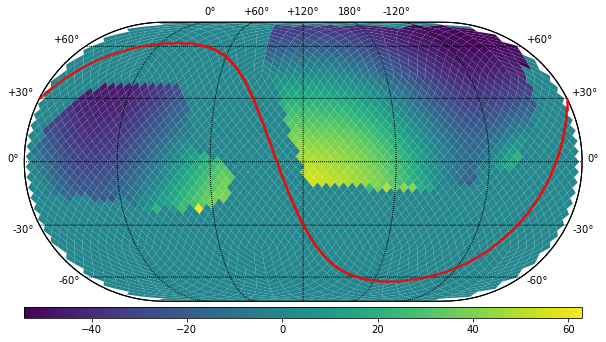

In [35]:
f = figure(figsize=(10,10))
desiplots.plot_sky_binned(t['RA'],t['DEC'],data=t['v_helio'],
                          plot_type='healpix',
                          max_bin_area=30.0,clip_lo=-500,clip_hi=500);
grid()

### Heliocentric RV, Galactic coordinates (scatterplot)

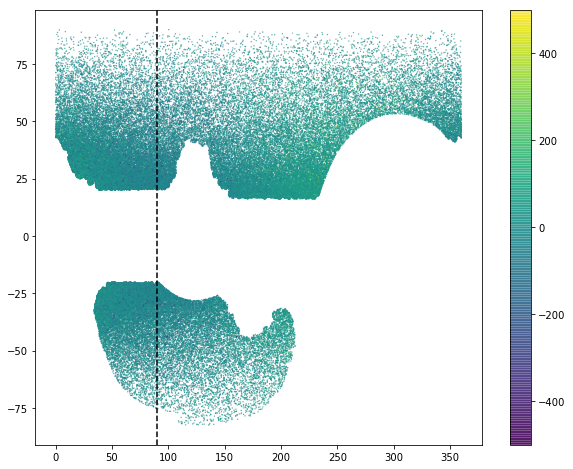

In [36]:
figure(figsize=(10,8))
vh_norm = Normalize(vmin=-500,vmax=500)
pl.scatter(t['l'][rsample[::10]],t['b'][rsample[::10]],s=2,edgecolor='None',
           alpha=0.7,
           c=t['v_helio'][rsample[::10]],norm=vh_norm,
           cmap='viridis');
colorbar();
axvline(90,c='k',ls='--');

### Heliocentric RV, Galactic coordinates (binned without projection)

In [37]:
import scipy.stats as sps
binsize = 5
lbins   = np.arange(0,360+binsize,binsize)
bbins   = np.arange(-90,90+binsize,binsize)
_h,_ex,_ey,_bn = sps.binned_statistic_2d(t['l'][rsample],t['b'][rsample],
                                         t['v_helio'][rsample],
                                         bins=(lbins,bbins),statistic='mean')

-76.6012180328 217.747116089 -10.4494905237


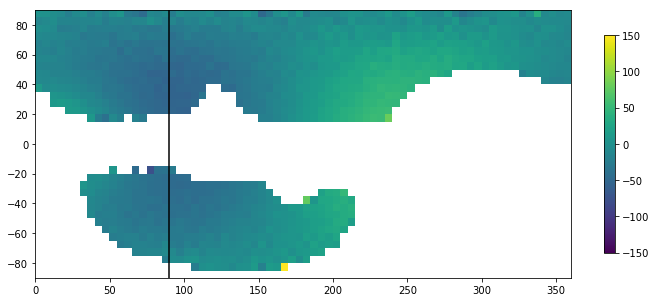

In [38]:
figure(figsize=(12,8))
_i = np.isfinite(_h)
print(_h[_i].min(),_h[_i].max(),np.median(_h[_i]))
imshow(_h.T,origin='lower',extent=(_ex[0],_ex[-1],_ey[0],_ey[-1]),interpolation='nearest',vmin=-150,vmax=150,
       cmap='viridis');
colorbar(shrink=0.5);
axvline(90,c='k');

### Equatorial PMs (histogram)

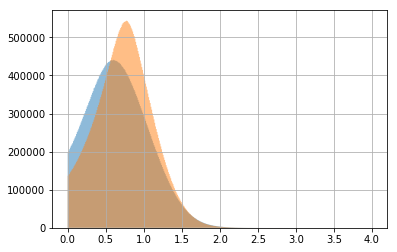

In [41]:
hist(ma.log10(np.abs(t['pm_RA'])),bins=np.arange(0,4.01,0.01),alpha=0.5,histtype='stepfilled');
hist(ma.log10(np.abs(t['pm_DEC'])),bins=np.arange(0,4.01,0.01),alpha=0.5,histtype='stepfilled');
grid();

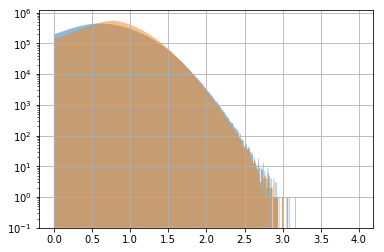

In [42]:
hist(np.log10(ma.abs(t['pm_RA'])),bins=np.arange(0,4,0.01),alpha=0.5,histtype='stepfilled',log=True);
hist(ma.log10(ma.abs(t['pm_DEC'])),bins=np.arange(0,4,0.01),alpha=0.5,histtype='stepfilled',log=True);
grid();

### Galactic PMs (histogram)

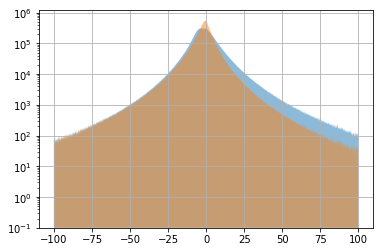

In [43]:
hist(t['pm_l'],bins=np.arange(-100,100,0.1),alpha=0.5,histtype='stepfilled',log=True);
hist(t['pm_b'],bins=np.arange(-100,100,0.1),alpha=0.5,histtype='stepfilled',log=True);
grid();

Zoom around zero PM

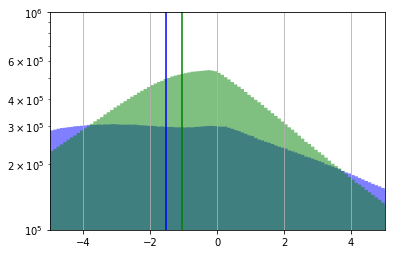

In [48]:
hist(t['pm_l'],bins=np.arange(-100,100,0.1),alpha=0.5,histtype='stepfilled',log=True,color='b');
hist(t['pm_b'],bins=np.arange(-100,100,0.1),alpha=0.5,histtype='stepfilled',log=True,color='g');

xlim(-5,5)
ylim(10**5,10**6)
pl.axvline(np.median(t['pm_l']),c='b')
pl.axvline(np.median(t['pm_b']),c='g')
grid();

Absolute value

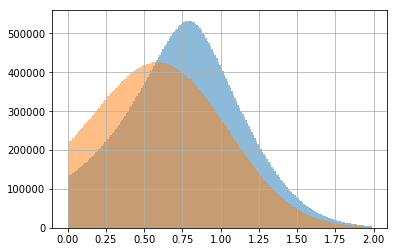

In [49]:
hist(np.log10(np.abs(t['pm_l'])),bins=np.arange(0,2,0.01),alpha=0.5,histtype='stepfilled');
hist(ma.log10(np.abs(t['pm_b'])),bins=np.arange(0,2,0.01),alpha=0.5,histtype='stepfilled');
grid();

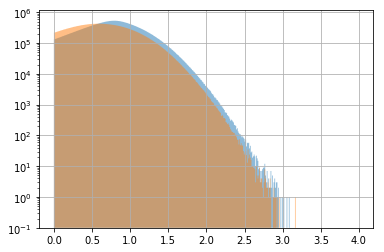

In [50]:
hist(np.log10(np.abs(t['pm_l'])),bins=np.arange(0,4,0.01),alpha=0.5,histtype='stepfilled',log=True);
hist(ma.log10(np.abs(t['pm_b'])),bins=np.arange(0,4,0.01),alpha=0.5,histtype='stepfilled',log=True);
grid();

Same thing in km/s.

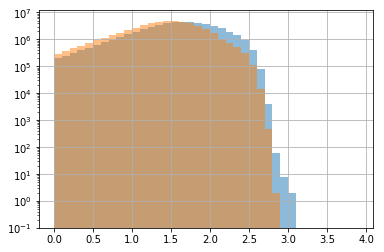

In [53]:
hist(ma.log10(np.abs(t['pm_l_kms'])),bins=np.arange(0,4,0.1),alpha=0.5,histtype='stepfilled',log=True);
hist(ma.log10(np.abs(t['pm_b_kms'])),bins=np.arange(0,4,0.1),alpha=0.5,histtype='stepfilled',log=True);
grid()

### Radial velocity (histograms)

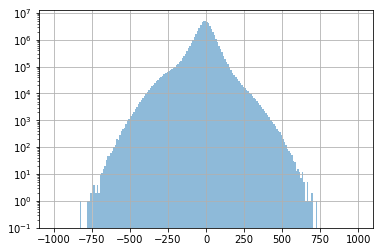

In [52]:
hist(t['v_helio'],bins=np.arange(-1000,1010,10.0),alpha=0.5,histtype='stepfilled',log='True');
grid();

### Tangential velocity (histograms)

1029.5


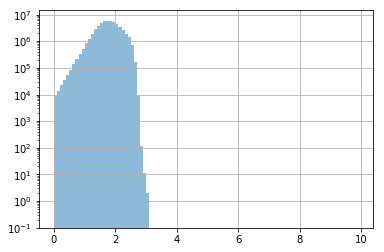

In [54]:
vtan = np.sqrt(t['pm_l_kms']**2 + t['pm_b_kms']**2)
print(vtan.max())
hist(ma.log10(vtan),bins=np.arange(0,10,0.1),alpha=0.5,histtype='stepfilled',log=True);
grid()

# Distance vs PM

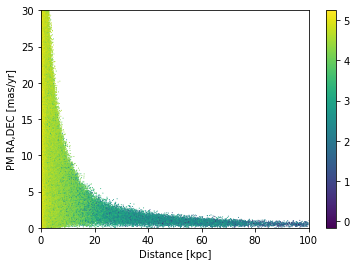

In [55]:
_s = scatter(t['d_helio'][rsample],pmtot[rsample],s=1,c=t['logg'][rsample],edgecolor='None')
colorbar(_s)
pl.xlabel('Distance [kpc]')
pl.ylabel('PM RA,DEC [mas/yr]')
pl.xlim(0,100)
pl.ylim(0,30);

(-50, 50)

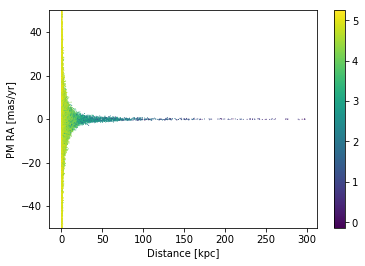

In [56]:
_s = scatter(t['d_helio'][rsample[::10]],t['pm_RA'][rsample[::10]],s=1,c=t['logg'][rsample[::10]],edgecolor='None')
colorbar(_s)
pl.xlabel('Distance [kpc]')
pl.ylabel('PM RA [mas/yr]')
ylim(-50,50)

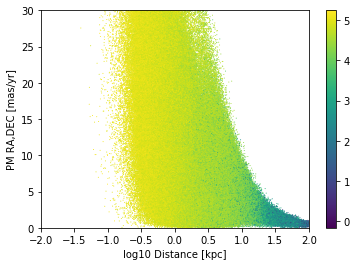

In [57]:
_s = scatter(np.log10(t['d_helio'][rsample]),pmtot[rsample],s=1,c=t['logg'][rsample],edgecolor='None')
colorbar(_s)
pl.xlabel('log10 Distance [kpc]')
pl.ylabel('PM RA,DEC [mas/yr]')
pl.xlim(-2,2)
pl.ylim(0,30);

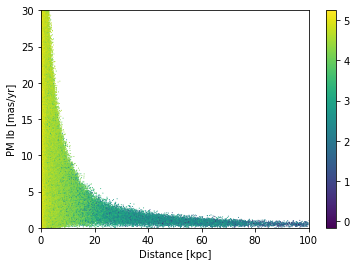

In [58]:
_s = scatter(t['d_helio'][rsample],pmtot_lb[rsample],c=t['logg'][rsample],s=1,edgecolor='None')
colorbar(_s)
pl.xlabel('Distance [kpc]')
pl.ylabel('PM lb [mas/yr]')
pl.xlim(0,100)
pl.ylim(0,30);

# Coordinates vs. PM

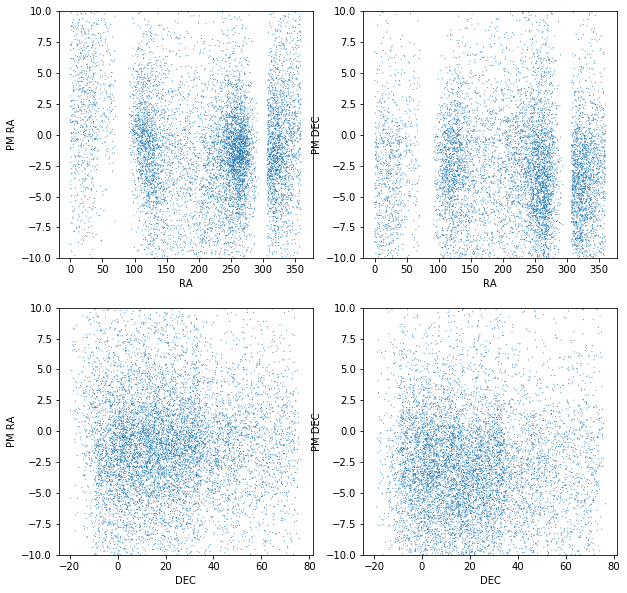

In [59]:
_f = figure(figsize=(10,10))

ax = _f.add_subplot(221)
pl.scatter(t['RA'][rsample[::100]],t['pm_RA'][rsample[::100]],s=1,edgecolor='None')
ylim(-10,10);
xlabel('RA')
ylabel('PM RA')
ax = _f.add_subplot(222)
pl.scatter(t['RA'][rsample[::100]],t['pm_DEC'][rsample[::100]],s=1,edgecolor='None')
ylim(-10,10);
xlabel('RA')
ylabel('PM DEC')
ax = _f.add_subplot(223)
pl.scatter(t['DEC'][rsample[::100]],t['pm_RA'][rsample[::100]],s=1,edgecolor='None')
ylim(-10,10);
xlabel('DEC')
ylabel('PM RA')
ax = _f.add_subplot(224)
pl.scatter(t['DEC'][rsample[::100]],t['pm_DEC'][rsample[::100]],s=1,edgecolor='None')
ylim(-10,10);
xlabel('DEC')
ylabel('PM DEC');

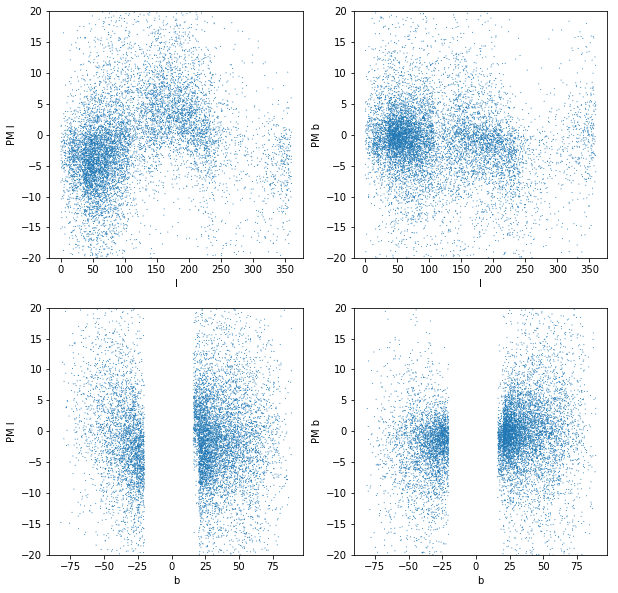

In [60]:
_f = figure(figsize=(10,10))

ax = _f.add_subplot(221)
pl.scatter(t['l'][rsample[::100]],t['pm_l'][rsample[::100]],s=1,edgecolor='None')
ylim(-20,20);
xlabel('l')
ylabel('PM l')
ax = _f.add_subplot(222)
pl.scatter(t['l'][rsample[::100]],t['pm_b'][rsample[::100]],s=1,edgecolor='None')
ylim(-20,20);
xlabel('l')
ylabel('PM b')
ax = _f.add_subplot(223)
pl.scatter(t['b'][rsample[::100]],t['pm_l'][rsample[::100]],s=1,edgecolor='None')
ylim(-20,20);
xlabel('b')
ylabel('PM l')
ax = _f.add_subplot(224)
pl.scatter(t['b'][rsample[::100]],t['pm_b'][rsample[::100]],s=1,edgecolor='None')
ylim(-20,20);
xlabel('b')
ylabel('PM b');

# Misc

In [61]:
all_gal = c.SkyCoord(t['l'],t['b'],frame='galactic')

In [62]:
l90_gal = c.SkyCoord(90*u.deg,0*u.deg,frame='galactic')
l90_equ = l90_gal.transform_to('icrs')

l270_gal = c.SkyCoord(270*u.deg,0*u.deg,frame='galactic')
l270_equ = l270_gal.transform_to('icrs')

In [63]:
# Select stars around l=90, b=0 (need quite a wide circle since the footprint doesn't get close to the plane)
nearl90 = all_gal.separation(l90_gal) < 60.0*u.deg

In [64]:
# Select stars around l=270, b=0 (need quite a wide circle since the footprint doesn't get close to the plane)
nearl270 = all_gal.separation(l270_gal) < 60.0*u.deg

In [65]:
wnearl90 = np.where(nearl90)[0]
wnearl90.shape

(25224888,)

In [66]:
wnearl270 = np.where(nearl270)[0]
wnearl270.shape

(3911848,)

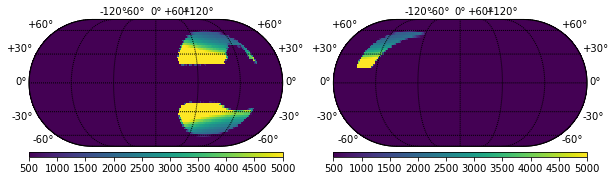

In [67]:
f = figure(figsize=(10,10))
ax = pl.subplot(121)
my_basemap = desiplots.init_sky(projection='eck4', ra_center=0, galactic_plane_color='None',
                                ra_labels=np.arange(-90, 90, 30), 
                                dec_labels=np.arange(0, 360, 60), 
                                ax=ax)
desiplots.plot_sky_binned(t['l'][wnearl90],t['b'][wnearl90],max_bin_area=5.0,clip_lo=100*5,clip_hi=1000*5,basemap=my_basemap);
grid()
ax = pl.subplot(122)
my_basemap = desiplots.init_sky(projection='eck4', ra_center=0, galactic_plane_color='None',
                                ra_labels=np.arange(-90, 90, 30), 
                                dec_labels=np.arange(0, 360, 60), 
                                ax=ax)
desiplots.plot_sky_binned(t['l'][wnearl270],t['b'][wnearl270],max_bin_area=5.0,clip_lo=100*5,clip_hi=1000*5,basemap=my_basemap);
grid()

(-8, 8)

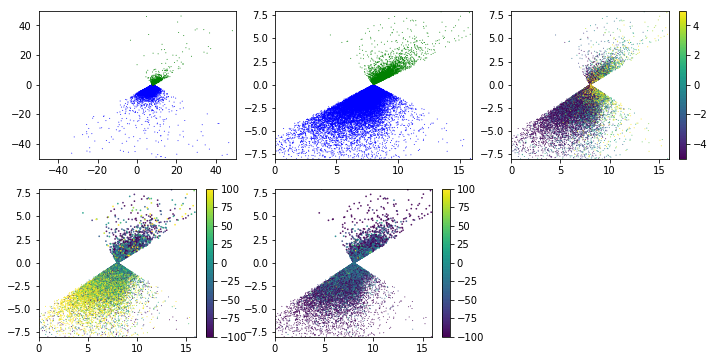

In [68]:
pm_norm  = Normalize(-5,5)
vel_norm = Normalize(-100,100)

_f = figure(figsize=(12,6))
ax = _f.add_subplot(231)
scatter(t['X'][wnearl90[::1000]],t['Y'][wnearl90[::1000]],s=1,c='b',edgecolor='None',alpha=0.9)
scatter(t['X'][wnearl270[::1000]],t['Y'][wnearl270[::1000]],s=1,c='g',edgecolor='None',alpha=0.9)
pl.xlim(-50,50)
pl.ylim(-50,50)
ax = _f.add_subplot(232)
scatter(t['X'][wnearl90[::1000]],t['Y'][wnearl90[::1000]],s=1,c='b',edgecolor='None',alpha=0.9)
scatter(t['X'][wnearl270[::1000]],t['Y'][wnearl270[::1000]],s=1,c='g',edgecolor='None',alpha=0.9)
pl.xlim(0,16)
pl.ylim(-8,8)
ax = _f.add_subplot(233)
scatter(t['X'][wnearl90[::1000]],t['Y'][wnearl90[::1000]],s=1,c=t['pm_l'][wnearl90[::1000]],
        norm=pm_norm,
        edgecolor='None',alpha=0.9)
scatter(t['X'][wnearl270[::1000]],t['Y'][wnearl270[::1000]],s=1,c=t['pm_l'][wnearl270[::1000]],
        norm=pm_norm,
        edgecolor='None',alpha=0.9)
pl.xlim(0,16)
pl.ylim(-8,8)
colorbar();
ax = _f.add_subplot(234)
scatter(t['X'][wnearl90[::1000]],t['Y'][wnearl90[::1000]],s=1,c=t['vU'][wnearl90[::1000]],
        norm=vel_norm,
        edgecolor='None',alpha=0.9)
scatter(t['X'][wnearl270[::1000]],t['Y'][wnearl270[::1000]],s=3,c=t['vU'][wnearl270[::1000]],
        norm=vel_norm,
        edgecolor='None',alpha=0.9)
colorbar();
pl.xlim(0,16)
pl.ylim(-8,8)
ax = _f.add_subplot(235)
scatter(t['X'][wnearl90[::1000]],t['Y'][wnearl90[::1000]],s=1,c=t['vV'][wnearl90[::1000]],
        norm=vel_norm,
        edgecolor='None',alpha=0.9)
scatter(t['X'][wnearl270[::1000]],t['Y'][wnearl270[::1000]],s=3,c=t['vV'][wnearl270[::1000]],
        norm=vel_norm,
        edgecolor='None',alpha=0.9)
colorbar();
pl.xlim(0,16)
pl.ylim(-8,8)

In [ ]:
h90  = hist(t['v_helio'][wnearl90],bins=np.arange(-500,501,1),histtype='stepfilled',alpha=0.5,
            color='b',normed=True);
h270 = hist(t['v_helio'][wnearl270],bins=np.arange(-500,501,1),histtype='stepfilled'
            color='g',alpha=0.5,normed=True);
xlim(-50,50)
axvline(0,c='k')

axvline(np.median(t['v_helio'][wnearl90]), color='b',ls='--')
axvline(np.median(t['v_helio'][wnearl270]),color='g',ls='--')

In [70]:
############################################################
class GalaxiaParams(object):
    # Galaxia parameters:
    # rSun[0]                             -8
    # rSun[1]                             0
    # rSun[2]                             0.015
    # vSun[0]                             11.1
    # vSun[1]                             239.08
    # vSun[2]                             7.25
    # sigma_r                             0.1
    # sigma_vr                            10
    # sigma_mu                            200
    # sigma_fe                            0.1
    # sigma_al                            0.1

    def __init__(self):
        """
        """
        u_kms = u.km/u.s
        # THESE ARE THE SOLAR UVW VALUES USED BY GALAXIA
        # Sun is moving relative to LSR:  
            # Towards GC
            # Faster than LSR
            # Northward of the plane
        self.gxa_u0   =  11.10*u_kms
        self.gxa_v0   =  12.24*u_kms
        self.gxa_w0   =   7.25*u_kms
        self.gxa_vLSR = 226.84*u_kms
        self.RSUN     =    8.0*u.kpc

        return

In [71]:
def sergey_galaxia_to_pm_radec(vx,vy,vz,D,ra,dec):
    """
    """
    import scipy
    cosd = lambda x: np.cos(np.deg2rad(x))
    sind = lambda x: np.sin(np.deg2rad(x))

    # IMPORTANT because of the conventions of the U pointing towards the
    # galactic center
    vx = - vx

    A_g = np.array([[0.0548755604, +0.4941094279, -0.8676661490],
                    [0.8734370902, -0.4448296300, -0.1980763734],
                    [0.4838350155, 0.7469822445, +0.4559837762]])

    # gal-eq rotation matrix
    A_g_I = scipy.linalg.inv(A_g)

    M00, M01, M02 = -sind(ra), cosd(ra), 0
    M10, M11, M12 = -cosd(ra) * sind(dec), -sind(ra) * sind(dec), cosd(dec)
    M20, M21, M22 =  cosd(ra) * cosd(dec), sind(ra) * cosd(dec), sind(dec)
    vx1, vy1, vz1 = (A_g_I[0, 0] * vx + A_g_I[1, 0] * vy + A_g_I[2,0]                    * vz,
                                        A_g_I[0, 1] * vx + A_g_I[1, 1]* vy + A_g_I[2, 1] * vz,
                                        A_g_I[0, 2] * vx + A_g_I[1, 2]* vy + A_g_I[2, 2] * vz)

    # convert galactic to equatorial

    pmra  = M00 * vx1 + M01 * vy1
    pmdec = M10 * vx1 + M11 * vy1 + M12 * vz1
    vrad  = M20 * vx1 + M21 * vy1 + M22 * vz1
    vtan  = np.sqrt(pmra**2+pmdec**2)  
    # tangential rv
    pmra, pmdec = [_ / 4.74 / D for _ in [pmra, pmdec]]  # in mas/yr
    return pmra, pmdec, vrad

In [100]:
# Convert positions back to Galaxia system
galaxia = GalaxiaParams()
U_gxa = -t['vX'] - galaxia.gxa_u0 
V_gxa = -t['vY'] - galaxia.gxa_v0 - galaxia.gxa_vLSR
W_gxa =  t['vZ'] - galaxia.gxa_w0

In [101]:
s_pmra,s_pmdec,s_vrad = sergey_galaxia_to_pm_radec(U_gxa.value,V_gxa.value,W_gxa.value,t['d_helio'].data,t['RA'].data,t['DEC'].data)

In [102]:
s_pmtot = np.sqrt(s_pmra**2 + s_pmdec**2)

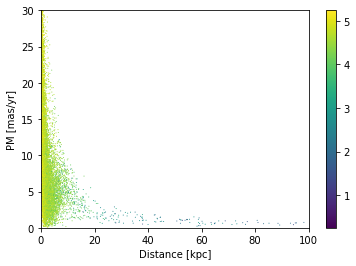

In [103]:
_s = scatter(t['d_helio'][rsample[::100]],s_pmtot[rsample[::100]],c=t['logg'][rsample[::100]],s=1,edgecolor='None')
colorbar(_s)
pl.xlabel('Distance [kpc]')
pl.ylabel('PM [mas/yr]')
pl.xlim(0,100)
pl.ylim(0,30);

In [104]:
import pygaia
from pygaia.astrometry import coordinates as pygc

icrs2gal = pygc.CoordinateTransformation(pygc.Transformations.ICRS2GAL)

In [105]:
S = 10000
s_pml, s_pmb = icrs2gal.transformProperMotions(radians(t['RA'].data[::S]),radians(t['DEC'].data[::S]),s_pmra[::S],s_pmdec[::S])

In [106]:
s_pmtot_lb = np.sqrt(s_pml**2 + s_pmb**2)

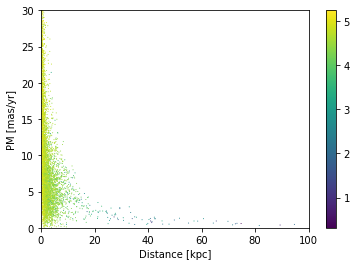

In [107]:
_s = scatter(t['d_helio'][::S],s_pmtot_lb,c=t['logg'][::S],s=1,edgecolor='None')
colorbar(_s)
pl.xlabel('Distance [kpc]')
pl.ylabel('PM [mas/yr]')
pl.xlim(0,100)
pl.ylim(0,30);

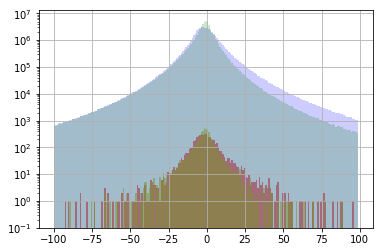

In [108]:
hist(s_pml,bins=np.arange(-100,100,1),alpha=0.5,histtype='stepfilled',log=True,color='r');
hist(s_pmb,bins=np.arange(-100,100,1),alpha=0.5,histtype='stepfilled',log=True,color='y');
hist(t['pm_l'],bins=np.arange(-100,100,1),alpha=0.2,histtype='stepfilled',log=True,color='b');
hist(t['pm_b'],bins=np.arange(-100,100,1),alpha=0.2,histtype='stepfilled',log=True,color='g');
grid(); 

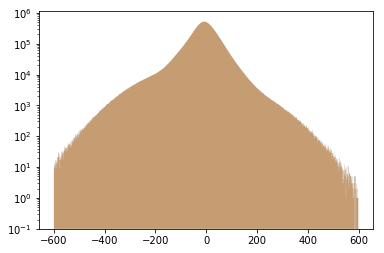

In [109]:
hist(s_vrad,bins=np.arange(-600,600,1),alpha=0.5,histtype='stepfilled',log=True);


hist(t['v_helio'],bins=np.arange(-600,600,1),alpha=0.5,histtype='stepfilled',log=True);

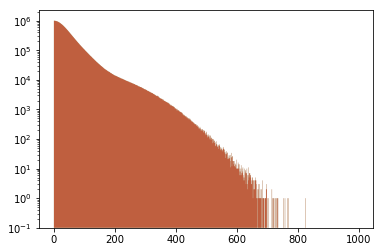

In [120]:
#hist(np.sqrt(t['vX']**2+t['vY']**2+t['vZ']**2),bins=np.arange(0,1000,1),alpha=0.5,histtype='stepfilled',log=True,color='y');
#hist(np.sqrt(U_gxa**2+V_gxa**2+W_gxa**2),bins=np.arange(0,1000,1),alpha=0.5,histtype='stepfilled',log=True,color='b');

hist(np.abs(s_vrad),bins=np.arange(0,1000,1),alpha=0.5,histtype='stepfilled',log=True,color='g');

#hist(np.abs(t['vRcyl']),bins=np.arange(0,1000,1),alpha=0.5,histtype='stepfilled',log=True,color='pink',edgecolor='k', lw=2);
hist(np.abs(t['v_helio']),bins=np.arange(0,1000,1),alpha=0.5,histtype='stepfilled',log=True,color='r');

-76.6012103665 217.747103956 -10.4494931993


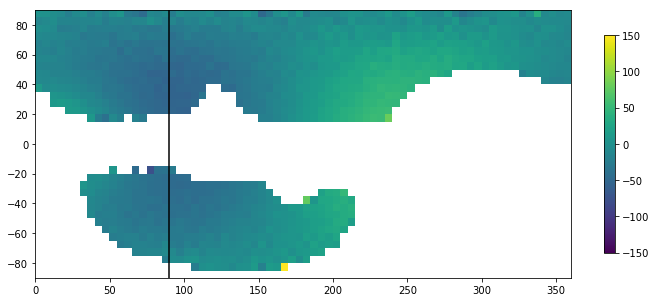

In [113]:
import scipy.stats as sps
binsize = 5
lbins   = np.arange(0,360+binsize,binsize)
bbins   = np.arange(-90,90+binsize,binsize)
_h,_ex,_ey,_bn = sps.binned_statistic_2d(t['l'][rsample],t['b'][rsample],
                                         s_vrad[rsample],
                                         bins=(lbins,bbins),statistic='mean')
figure(figsize=(12,8))
_i = np.isfinite(_h)
print(_h[_i].min(),_h[_i].max(),np.median(_h[_i]))
imshow(_h.T,origin='lower',extent=(_ex[0],_ex[-1],_ey[0],_ey[-1]),interpolation='nearest',vmin=-150,vmax=150,
       cmap='viridis');
colorbar(shrink=0.5);
axvline(90,c='k');

-76.6012180328 217.747116089 -10.4494905237


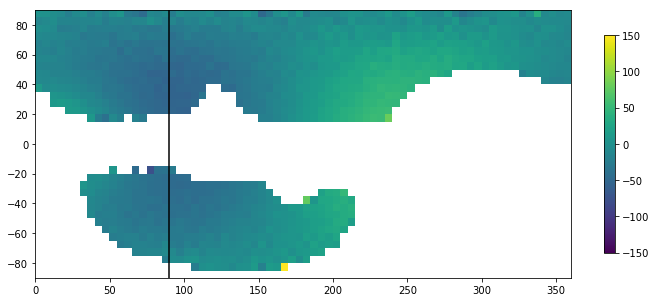

In [115]:
import scipy.stats as sps
binsize = 5
lbins   = np.arange(0,360+binsize,binsize)
bbins   = np.arange(-90,90+binsize,binsize)
_h,_ex,_ey,_bn = sps.binned_statistic_2d(t['l'][rsample],t['b'][rsample],
                                         t['v_helio'][rsample],
                                         bins=(lbins,bbins),statistic='mean')
figure(figsize=(12,8))
_i = np.isfinite(_h)
print(_h[_i].min(),_h[_i].max(),np.median(_h[_i]))
imshow(_h.T,origin='lower',extent=(_ex[0],_ex[-1],_ey[0],_ey[-1]),interpolation='nearest',vmin=-150,vmax=150,
       cmap='viridis');
colorbar(shrink=0.5);
axvline(90,c='k');